In [2]:
import pandas_datareader.data as pdr

def get_stock_data(code):
  df = pdr.DataReader("{}.JP".format(code), "stooq").sort_index()
  return df

In [1]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 2.4 MB/s eta 0:00:00


In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

In [3]:
!pip install pandas_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218921 sha256=7ec7309f12dbcbb0c27e94ee6b64741ecb5e98a4c260a4e8f87e4d6bf9b3bd80
  Stored in directory: /root/.cache/pip/wheels/1e/5c/47/759b32beb377aee150eb4c1f1b2b7635032cc19ea09ce076fd
Successfully built pandas_ta


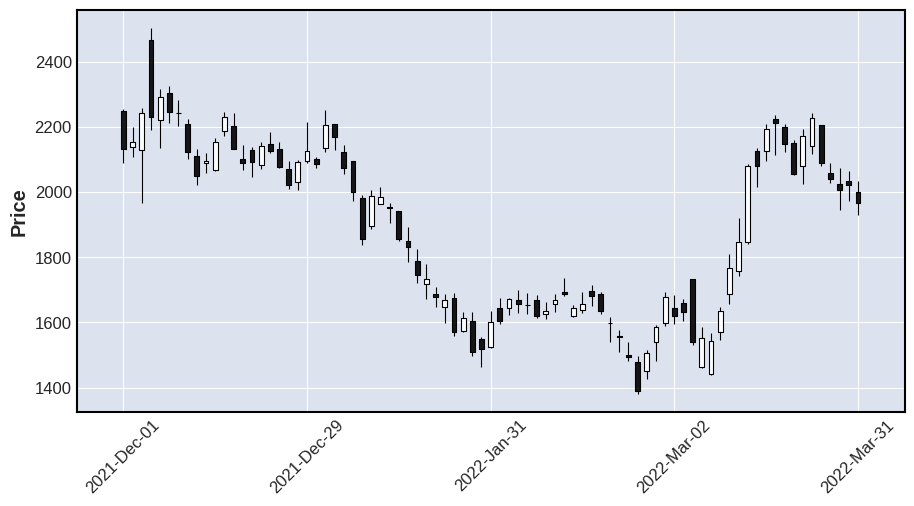

In [4]:
import mplfinance as mpf
import datetime as dt
#import talib as ta
import pandas_ta as ta

df = get_stock_data(2929)  # ファーマフーズ
rdf = df[dt.datetime(2021,12,1):dt.datetime(2022,3,31)]
mpf.plot(rdf, type="candle", figratio=(2,1))

<ipython-input-5-1ec3283949a9>:25: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = axes[0].get_legend().legendHandles


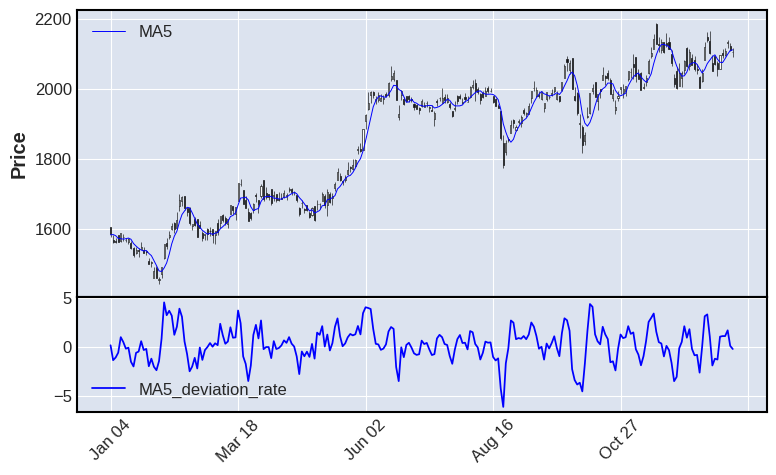

In [5]:
df = get_stock_data(7203)   # トヨタ自動車
close = df["Close"]

# 5日移動平均
#df['ma5'] = ta.SMA(close ,timeperiod=5)
df['ma5'] = ta.sma(close ,length=5)

# 乖離率
df['ma5_deviation_rate'] = (close - df['ma5']) / df['ma5'] * 100

rdf = df[dt.datetime(2021,1,1):dt.datetime(2021,12,31)]

apd  = {
          # 5日移動平均
          "MA5": mpf.make_addplot(rdf['ma5'], color='blue', 
                              panel=0, width=0.7),  
          # 乖離率     
          "MA5_deviation_rate": mpf.make_addplot(rdf['ma5_deviation_rate'], 
                              color='blue', panel=1)
        }

fig, axes = mpf.plot(rdf, type="candle", figratio=(5,3), 
                      addplot=list(apd.values()), returnfig=True)
axes[0].legend([None]*(len(apd)+2))
handles = axes[0].get_legend().legendHandles
axes[0].legend(handles=handles[2:], labels=list(apd.keys()))
axes[2].legend(["MA5_deviation_rate"])
fig.show()

<ipython-input-9-40bad52bad85>:46: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = axes[0].get_legend().legendHandles


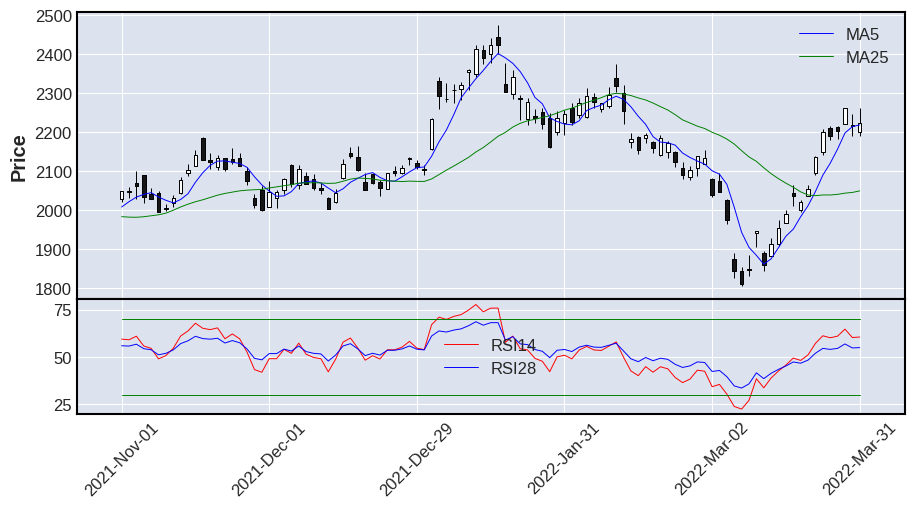

In [9]:
df = get_stock_data(7203)    # トヨタ自動車
close = df["Close"]

# 移動平均
#df['ma5'], df['ma25'] = ta.SMA(close ,timeperiod=5), ta.SMA(close ,timeperiod=25)

df['ma5'], df['ma25'] = ta.sma(close ,length=5), ta.sma(close ,length=25)

# RSI
#rsi14 = ta.RSI(close, timeperiod=14)
#rsi28 = ta.RSI(close, timeperiod=28)

rsi14 = ta.rsi(close, length=14)
rsi28 = ta.rsi(close, length=28)
df['rsi14'], df['rsi28'] = rsi14, rsi28

# 補助線
df['70'] = [70 for _ in close] # 買われすぎの目安
df['30'] = [30 for _ in close] # 売られすぎの目安

rdf = df[dt.datetime(2021,11,1):dt.datetime(2022,3,31)]

apd  = {
          # 5日移動平均線  
          "MA5": mpf.make_addplot(rdf['ma5'], color='blue', 
                                panel=0, width=0.7), 
          # 25日移動平均線
          "MA25": mpf.make_addplot(rdf['ma25'], color='green', 
                                panel=0, width=0.7),
          # RSI 14
          "RSI14": mpf.make_addplot(rdf['rsi14'], color='red', 
                                panel=1, width=0.7),
          # RSI 28
          "RSI28": mpf.make_addplot(rdf['rsi28'], color='blue',
                                panel=1, width=0.7), 
          # 補助線
          "70": mpf.make_addplot(rdf['70'], color='green', 
                                panel=1, width=0.7),
          "30": mpf.make_addplot(rdf['30'], color='green',
                                panel=1, width=0.7)
      }

fig, axes = mpf.plot(rdf, type="candle", figratio=(2,1), 
                     addplot=list(apd.values()), returnfig=True)
axes[0].legend([None]*(len(apd)+2))
handles = axes[0].get_legend().legendHandles
axes[0].legend(handles=handles[2:4], labels=list(apd.keys()))
axes[2].legend(["RSI14", "RSI28"])
fig.show()

<ipython-input-13-17f8da3581bc>:48: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = axes[0].get_legend().legendHandles


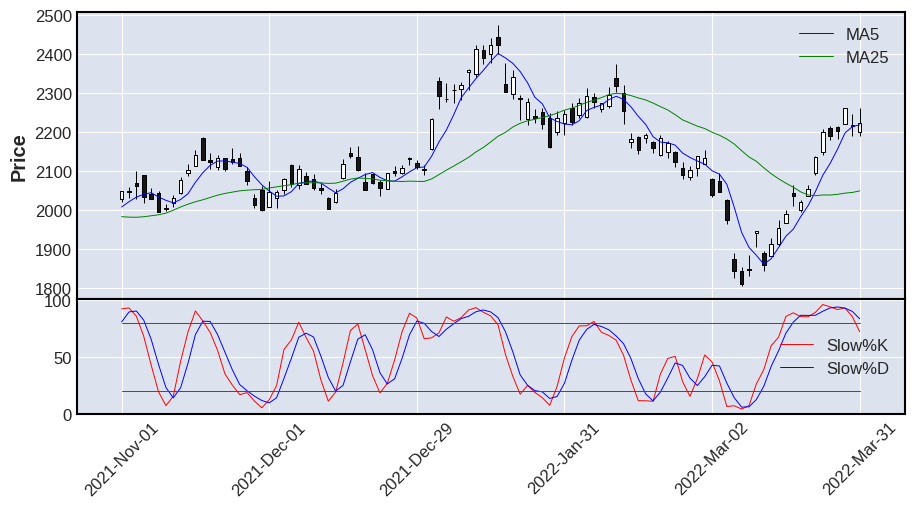

In [13]:
df = get_stock_data(7203)     # トヨタ自動車
close = df["Close"]

# 移動平均
#df['ma5'], df['ma25'] = ta.SMA(close ,timeperiod=5), ta.SMA(close ,timeperiod=25)

df['ma5'], df['ma25'] = ta.sma(close ,length=5), ta.sma(close ,length=25)

# ストキャスティクス
#slowK, slowD = ta.STOCH(df["High"], df["Low"], close,
#                                fastk_period=5, slowk_period=3, 
#                                slowk_matype=0, slowd_period=3, 
#                                slowd_matype=0)
#df['slowK'], df['slowD'] = slowK, slowD

sdf = ta.stoch(df["High"], df["Low"], close, k=5, d=3, smooth_k=3, mamode="sma")
df['slowK'], df['slowD'] = sdf['STOCHk_5_3_3'], sdf['STOCHd_5_3_3']

# 補助線
df['80'] = [80 for _ in close]
df['20'] = [20 for _ in close]

rdf = df[dt.datetime(2021,11,1):dt.datetime(2022,3,31)]

apd  = {
          # 5日移動平均線 
          "MA5": mpf.make_addplot(rdf['ma5'], color='blue', 
                              panel=0, width=0.7),
          # 25日移動平均線   
          "MA25": mpf.make_addplot(rdf['ma25'], color='green', 
                              panel=0, width=0.7), 
          # Slow％K
          "Slow%K": mpf.make_addplot(rdf['slowK'], color='red', 
                              panel=1, width=0.7),
          # Slow％D
          "Slow%D": mpf.make_addplot(rdf['slowD'], color='blue', 
                              panel=1, width=0.7), 
          # 補助線
          "80": mpf.make_addplot(rdf['80'], color='green', 
                              panel=1, width=0.7),
          "20": mpf.make_addplot(rdf['20'], color='green', 
                              panel=1, width=0.7)
        }

fig, axes = mpf.plot(rdf, type="candle", figratio=(2,1), 
                      addplot=list(apd.values()), returnfig=True)
axes[0].legend([None]*(len(apd)+2))
handles = axes[0].get_legend().legendHandles
axes[0].legend(handles=handles[2:], labels=list(apd.keys()))
axes[2].legend(["Slow%K", "Slow%D"])
fig.show()

<ipython-input-14-0c447a712ccd>:35: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = axes[0].get_legend().legendHandles


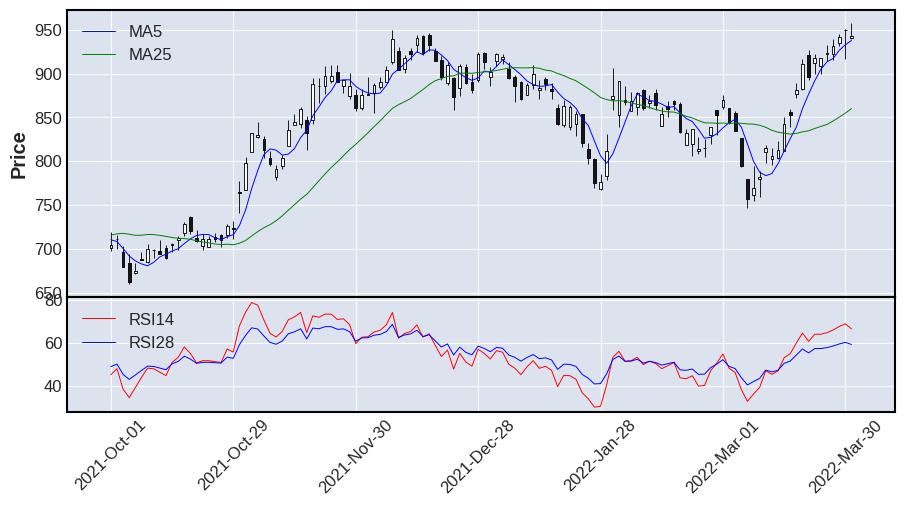

In [14]:
df = get_stock_data(6727)  # ワコム
close = df["Close"]

# 移動平均とRSI
#df['ma5'] = ta.SMA(close ,timeperiod=5)
#df['ma25'] = ta.SMA(close ,timeperiod=25)
#df['rsi14'] = ta.RSI(close, 14)
#df['rsi28'] = ta.RSI(close, 28)

df['ma5'] = ta.sma(close ,length=5)
df['ma25'] = ta.sma(close ,length=25)
df['rsi14'] = ta.rsi(close, length=14)
df['rsi28'] = ta.rsi(close, length=28)

rdf = df[dt.datetime(2021,10,1):dt.datetime(2022,3,31)]

apd  = {
          # 5日移動平均線  
          "MA5": mpf.make_addplot(rdf['ma5'], color='blue', 
                                panel=0, width=0.7), 
          # 25日移動平均線
          "MA25": mpf.make_addplot(rdf['ma25'], color='green', 
                                panel=0, width=0.7),
          # RSI 14
          "RSI14": mpf.make_addplot(rdf['rsi14'], color='red', 
                                panel=1, width=0.7),
          # RSI 28
          "RSI28": mpf.make_addplot(rdf['rsi28'], color='blue',
                                panel=1, width=0.7)
        }

fig, axes = mpf.plot(rdf, type="candle", figratio=(2,1), 
                      addplot=list(apd.values()), returnfig=True)
axes[0].legend([None]*(len(apd)+2))
handles = axes[0].get_legend().legendHandles
axes[0].legend(handles=handles[2:], labels=list(apd.keys()))
axes[2].legend(["RSI14", "RSI28"])
fig.show()

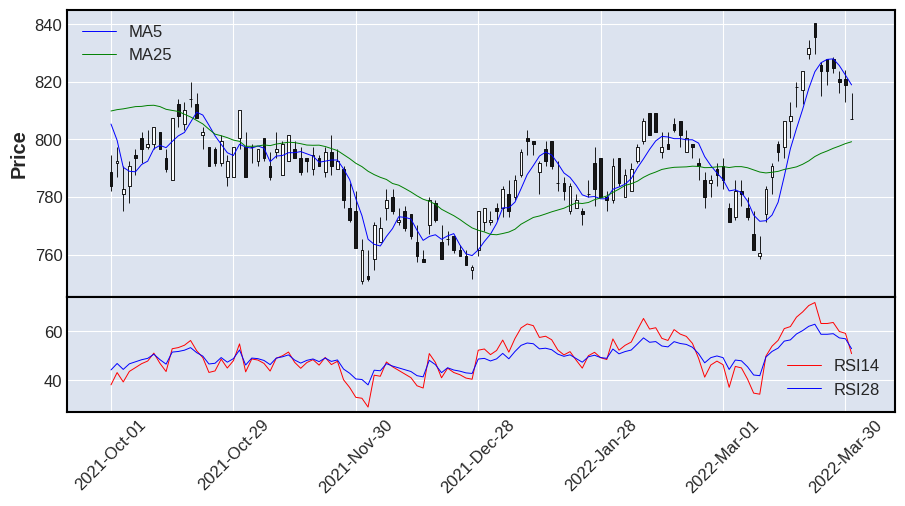

In [ ]:
df = get_stock_data(8628)  # 松井証券
close = df["Close"]

# 移動平均とRSI
#df['ma5'] = ta.SMA(close ,timeperiod=5)
#df['ma25'] = ta.SMA(close ,timeperiod=25)
df['rsi14'] = ta.RSI(close, 14)
df['rsi28'] = ta.RSI(close, 28)

df['ma5'] = ta.sma(close ,length=5)
df['ma25'] = ta.sma(close ,length=25)
df['rsi14'] = ta.rsi(close, length=14)
df['rsi28'] = ta.rsi(close, length=28)

rdf = df[dt.datetime(2021,10,1):dt.datetime(2022,3,31)]

apd  = {
          # 5日移動平均線  
          "MA5": mpf.make_addplot(rdf['ma5'], color='blue', 
                                panel=0, width=0.7), 
          # 25日移動平均線
          "MA25": mpf.make_addplot(rdf['ma25'], color='green', 
                                panel=0, width=0.7),
          # RSI 14
          "RSI14": mpf.make_addplot(rdf['rsi14'], color='red', 
                                panel=1, width=0.7),
          # RSI 28
          "RSI28": mpf.make_addplot(rdf['rsi28'], color='blue',
                                panel=1, width=0.7)
        }

fig, axes = mpf.plot(rdf, type="candle", figratio=(2,1), 
                      addplot=list(apd.values()), returnfig=True)
axes[0].legend([None]*(len(apd)+2))
handles = axes[0].get_legend().legendHandles
axes[0].legend(handles=handles[2:], labels=list(apd.keys()))
axes[2].legend(["RSI14", "RSI28"])
fig.show()